# Initialization  

Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.

If you completed the previous course of this specialization, you probably followed the instructions for weight initialization, and it has worked out so far. But how do you choose the initialization for a new neural network? In this notebook, you will see how different initializations lead to different results.

A well chosen initialization can:

1. Speed up the convergence of gradient descent  
2. Increase the odds of gradient descent converging to a lower training (and generalization) error

For this purpose we are going to keep improve The previously built deep neural network model from **Deep-Neural-Network** division. The model structure consists of four layers with with the following number of neurons ordinally [20,7,5,1] with the first three activation functions being **relu** while the output is activation is **sigmoid**. In addition, we will be employing the **cat-VS-noncat image classification  problem** in our implematation.

The initialization methods we are going to implement in this tuotorial are as follow:
* Zeros initialization -- setting initialization = "zeros" in the input argument.
* Random initialization -- setting initialization = "random" in the input argument. This initializes the weights to large random values.
* He initialization -- setting initialization = "he" in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015.

**Hint**: In **he** you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation.

# Related packages importing 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
from PIL import Image
from scipy import ndimage
# for windows os flip the forward slash (/) into backward slash (\)
os.chdir('../utils')
from lr_utils import load_dataset
from helpers import activation_fun, act_derivative, data_generator

%matplotlib inline

# Data preparation

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

y = 1. It's a cat picture.


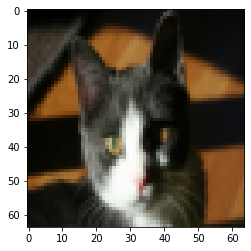

In [3]:
index = 19
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [5]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


# Neural network model  and weights initialization

All related functions of neural network model we prviously implemented are wrapped together in a python class for sake of implemetation simplicity. Our target function is **initialize_parameters()**, thus we are going to reimplement it separately and then plug it into the  class to perform our expriments. Lets get start.

In [6]:
# The previous weights initialization function
def initialize_parameters(layer_dims):
    
    parameters ={}
    L = len(layer_dims)
    for l in range(1,L):
        parameters['W'+ str(l)] =  np.random.randn(layer_dims[l],layer_dims[l-1])*0.1
        parameters['b'+ str(l)] =  np.zeros((layer_dims[l],1))
    
    return parameters

In [7]:
# The new weights initialization function
def initialize_parameters_n(layer_dims,initialization='he'):
    
    parameters ={}
    L = len(layer_dims)
    
    for l in range(1,L):
        #Zero initialization
        if initialization == 'zeros':
            parameters['W'+ str(l)] =  np.zeros((layer_dims[l],layer_dims[l-1]))
            parameters['b'+ str(l)] =  np.zeros((layer_dims[l],1))
        
        #random initialization
        elif initialization == 'random':
            parameters['W'+ str(l)] =  np.random.randn(layer_dims[l],layer_dims[l-1])
            parameters['b'+ str(l)] =  np.zeros((layer_dims[l],1))
        
        #he initialization
        elif initialization == 'he':
            parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * np.sqrt(2 / layer_dims[l - 1])
            parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
            
    return parameters

In [8]:
# zero Testing
initialize_parameters_n([3,4,2,1],'zeros')

{'W1': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'b2': array([[0.],
        [0.]]),
 'W3': array([[0., 0.]]),
 'b3': array([[0.]])}

In [9]:
# random Testing
initialize_parameters_n([3,4,2,1],'random')

{'W1': array([[-1.144661  , -0.85846058, -0.65381918],
        [-0.16766918, -1.03027174,  0.15822239],
        [ 0.70595887,  0.21574658, -1.61804088],
        [-0.06166343,  0.4977589 ,  0.1024669 ]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.84285383,  0.2143614 ,  0.33794017,  1.30743223],
        [ 0.53217207,  0.38534251,  0.57190469, -0.67722004]]),
 'b2': array([[0.],
        [0.]]),
 'W3': array([[-0.74773262,  1.27635632]]),
 'b3': array([[0.]])}

In [10]:
# he Testing
initialize_parameters_n([3,4,2,1],'he')

{'W1': array([[ 0.88511379, -0.81807085, -0.62869337],
        [ 2.32031992, -0.26533441, -0.40204191],
        [ 1.04035886,  0.28486774, -0.17442873],
        [ 0.17725151,  1.09475567,  0.37837029]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 1.0161422 , -0.90452823, -0.8364581 , -0.30646809],
        [-1.4782619 ,  0.17138038,  0.19912861, -0.13327281]]),
 'b2': array([[0.],
        [0.]]),
 'W3': array([[0.30827626, 1.81890671]]),
 'b3': array([[0.]])}

In [536]:
class DeepNeuralNet:
    
    xtr, ytr, xts, yts = data_generator()

    def __init__(self, 
                 X=xtr,
                 Y=ytr,
                 initialization = 'he',
                 activation_order= ['relu','relu','sigmoid'], 
                 layer_dims = [4,3,2,1], 
                 num_iterations = 1000, 
                 learning_rate =.005, 
                 print_cost = True,
                 random_state =241):
        
        self.X = X
        self.Y = Y
        self.initialization = initialization
        self.layer_dims = layer_dims
        self.activation_order = activation_order
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.print_cost = print_cost
        self.random_state = random_state
    

    # parameters initiation
    def initialize_parameters(self):
        np.random.seed(self.random_state)
        parameters ={}
        L = len(self.layer_dims)
        for l in range(1,L):
            #Zero initialization
            
            if self.initialization == 'zeros':
                parameters['W'+ str(l)] =  np.zeros((self.layer_dims[l],self.layer_dims[l-1]))
                parameters['b'+ str(l)] =  np.zeros((self.layer_dims[l],1))
        
            #random initialization
            elif self.initialization == 'random':
                parameters['W'+ str(l)] =  np.random.randn(self.layer_dims[l],self.layer_dims[l-1])
                parameters['b'+ str(l)] =  np.zeros((self.layer_dims[l],1))
        
            #he initialization
            elif self.initialization == 'he':
                parameters['W' + str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) \
                * np.sqrt(2 / self.layer_dims[l - 1])
                parameters['b' + str(l)] = np.zeros((self.layer_dims[l], 1))
    
        return parameters


    def forward_prop(self,X,parameters):
        
        A_prev = X
        cache = {}
    
        for  l,activation in enumerate(self.activation_order):
        
            W = parameters['W' + str(l+1)]
            b = parameters['b' + str(l+1)]
       
            Z = np.dot(W,A_prev) + b
            A = activation_fun(Z,activation_type= activation)
        
            cache['Z' + str(l+1)]= Z
            cache['A' + str(l+1)]= A
        
            A_prev = A
    
        return cache


    def compute_cost(self, cache):
    
        AL = cache[(list(cache.keys())[-1])]
        m = self.Y.shape[1]
    
        cost = np.squeeze((-1/m)*(np.dot(self.Y,np.log(AL).T)+ np.dot((1-self.Y),np.log(1-AL).T)))
        assert(cost.shape == ())
    
        return cost

    def backward_prop(self,parameters,cache):
    
        AL = cache['A'+str(len(self.activation_order))]
        grads = {}
        dA =  - (np.divide(self.Y, AL) - np.divide(1 - self.Y, 1 - AL))
        m = self.Y.shape[1]
    
    
        for l, activation in reversed(list(enumerate(self.activation_order))):
        
            Z = cache['Z' + str(l+1)]
        
            if l == 0:
                A_prev = self.X
            else:
                A_prev = cache['A' + str(l)]
            
            W = parameters['W' + str(l+1)]
        
            dZ = dA * act_derivative(Z, activation_type= activation)
            dW = (1/m) * np.dot(dZ,A_prev.T)
            db =  (1/m) * np.sum(np.dot(dZ, A_prev.T), axis = 1, keepdims =True)
            dA = np.dot(W.T,dZ)
        
            grads['dW'+ str(l+1)] = dW
            grads['db'+ str(l+1)] = db
    
        return grads

    def optimize(self,parameters, grads):
    
        L = int(len(grads)/2)+1
    
        for l in range(1,L):
        
            W = parameters['W' + str(l)]
            b = parameters['b' + str(l)]
        
            dW = grads['dW' + str(l)]
            db = grads['db' + str(l)]
        
            parameters['W' + str(l)] = W - self.learning_rate * dW
            parameters['b' + str(l)] = b - self.learning_rate * db
    
        return parameters


    def fit(self):
        costs = []
        global parameters
        parameters = self.initialize_parameters()

        for i in range(self.num_iterations):
    
            cache = self.forward_prop(self.X,parameters)
        
            cost = self.compute_cost(cache)
        
            grads = self.backward_prop(parameters,cache)
        
            parameters = self.optimize(parameters,grads)
        
            if self.print_cost and i % 1000 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
                costs.append(cost)
        
        # plot the loss
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per thosands)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
        

    def predict(self, X=xts,Y=yts):
    
        m = X.shape[1]
        p = np.zeros((1,m))
    
        # Forward propagation
        cache = self.forward_prop(X,parameters)
        probas = cache[(list(cache.keys())[-1])]

        # convert probas to 0/1 predictions
        for i in range(0,probas.shape[1]):
            if probas[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        print("Accuracy: "  + str(round(np.sum((p == Y)/m),2)))

# Experimentation

In [568]:
#hyperparameters defination

Xtr = train_x
Ytr = train_y
Xts = test_x
Yts = test_y
initialization = 'zeros'
activation_order= ['relu','relu','relu','sigmoid']
layer_dims = [12288,20,7,5,1] 
num_iterations =  12100
learning_rate =.0075
print_cost = True

## Zero initialization

In [637]:
model1 = DeepNeuralNet(X= Xtr,
                      Y= Ytr, 
                      initialization= 'zeros',
                      activation_order= activation_order,
                      layer_dims= layer_dims,
                      num_iterations= num_iterations,
                      learning_rate= learning_rate,
                      print_cost= print_cost,
                      random_state= 31)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.693147
Cost after iteration 2000: 0.693147
Cost after iteration 3000: 0.693147
Cost after iteration 4000: 0.693147
Cost after iteration 5000: 0.693147
Cost after iteration 6000: 0.693147
Cost after iteration 7000: 0.693147
Cost after iteration 8000: 0.693147
Cost after iteration 9000: 0.693147
Cost after iteration 10000: 0.693147
Cost after iteration 11000: 0.693147
Cost after iteration 12000: 0.693147


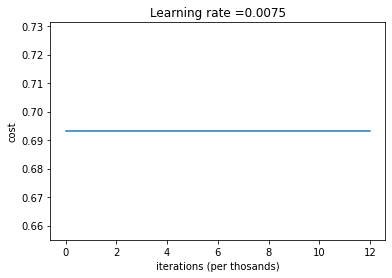

In [638]:
model1.fit()

In [639]:
model1.predict(Xtr,Ytr)

Accuracy: 0.66


In [640]:
model1.predict(Xts,Yts)

Accuracy: 0.34


## observations
In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression.

**solution** 

* The weights $W^{[l]}$ should be initialized randomly to break symmetry.
* It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly.



## Random initialization

In [629]:
model2 = DeepNeuralNet(X=Xtr,
                      Y=Ytr, 
                      initialization='random',
                      activation_order=activation_order,
                      layer_dims=layer_dims,
                      num_iterations=num_iterations,
                      learning_rate=learning_rate,
                      print_cost= print_cost,
                      random_state=31)

Cost after iteration 0: 17.599690
Cost after iteration 1000: 0.703050
Cost after iteration 2000: 0.654422
Cost after iteration 3000: 0.608232
Cost after iteration 4000: 0.572880
Cost after iteration 5000: 0.545270
Cost after iteration 6000: 0.505217
Cost after iteration 7000: 0.467723
Cost after iteration 8000: 0.439176
Cost after iteration 9000: 0.400588
Cost after iteration 10000: 0.367871
Cost after iteration 11000: 0.322613
Cost after iteration 12000: 0.283492


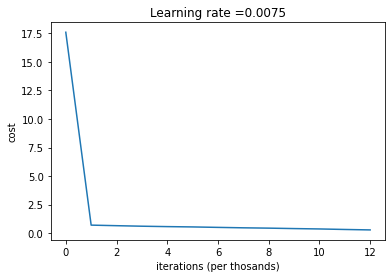

In [630]:
model2.fit()

In [631]:
model2.predict(Xtr,Ytr)

Accuracy: 0.89


In [632]:
model2.predict(Xts,Yts)

Accuracy: 0.5


## Observations  


* The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[4]}) = \log(0)$, the loss goes to infinity.
* Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm.
* If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

* Initializing weights to very large random values does not work well.
* Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part!


## He initialization

In [633]:
model3 = DeepNeuralNet(X=Xtr,
                      Y=Ytr, 
                      initialization='he',
                      activation_order=activation_order,
                      layer_dims=layer_dims,
                      num_iterations=num_iterations,
                      learning_rate=learning_rate,
                      print_cost= print_cost,
                      random_state= 31)

Cost after iteration 0: 0.683272
Cost after iteration 1000: 0.547664
Cost after iteration 2000: 0.124175
Cost after iteration 3000: 0.159316
Cost after iteration 4000: 0.451184
Cost after iteration 5000: 0.222256
Cost after iteration 6000: 0.124932
Cost after iteration 7000: 0.056863
Cost after iteration 8000: 0.010842
Cost after iteration 9000: 0.005164
Cost after iteration 10000: 0.002669
Cost after iteration 11000: 0.001516
Cost after iteration 12000: 0.001151


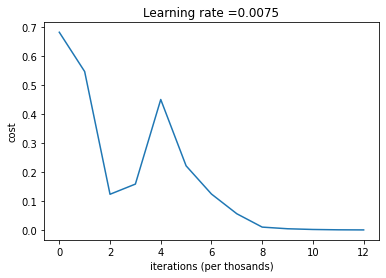

In [634]:
model3.fit()

In [635]:
model3.predict(Xtr,Ytr)

Accuracy: 1.0


In [636]:
model3.predict(Xts,Yts)

Accuracy: 0.7


## Observations  
* Using **He** initialization leads to achieving better results

# Conclusion


* Different initializations lead to different results
* Random initialization is used to break symmetry and make sure different hidden units can learn different things
* Don't intialize to values that are too large
* He initialization works well for networks with ReLU activations.
